**Brendan Bruce**

**ECE 573: HW3**

**Due Date: 4/2/2019**

In [1]:
from experiments import *

# Question 1

Develop an implementation of the basic symbol-table API that uses 2-3 trees that are not necessarily balanced as the underlying data structure. Allow 3-nodes to lean either way. Hook the new node onto the bottom with a black link when inserting into a 3-node at the bottom. 

## Discussion

I was unable to successfully implement a 2-3 tree as specified by the question. Instead of using a 2-3 tree I used the left leaning red black tree implementation that is used for later questions in the homework. Using this tree I implemented the basic symbol table API as described in the lecture slides. Below is a demo running through the "SEARCHEXAMPLE" example and demos the other functions.

## Results

In [2]:
q1()

Initialized empty symbol table
isEmpty() returns True
Adding keys: ['S', 'E', 'A', 'R', 'C', 'H', 'E', 'X', 'A', 'M', 'P', 'L', 'E'] and values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
isEmpty() returns False
keys() returns {'P', 'E', 'C', 'L', 'M', 'A', 'S', 'H', 'X', 'R'}
size() returns 10
contains(S) returns True
delete(S)
keys() returns {'P', 'E', 'C', 'L', 'M', 'A', 'H', 'X', 'R'}
size() returns 9
contains(S) returns False


# Question 2
Run experiments to develop a hypothesis estimating the average path length in a tree built from (i) N-random insertions. (ii) N-sorted insertions? 


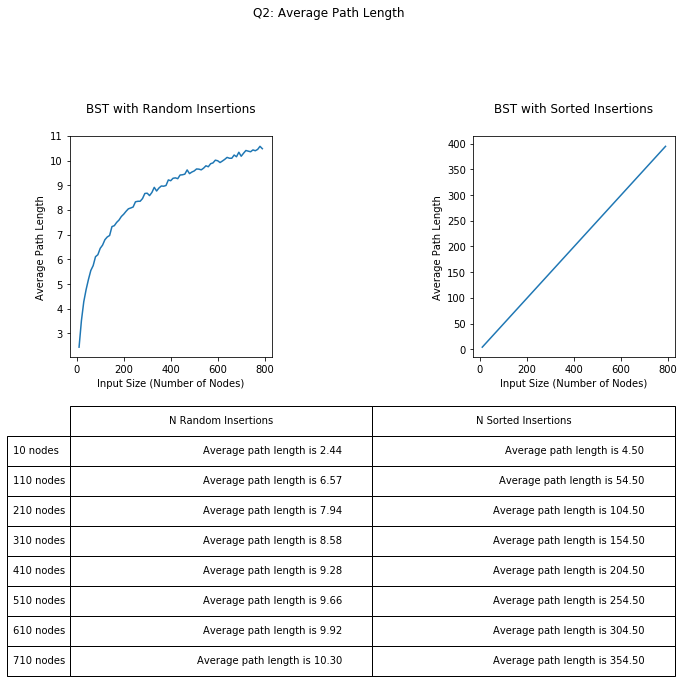

In [3]:
q2()

## Disucssion

The question did not specify the type of tree to use but because the topic of interest was average path length I figured it wanted a tree that did maintain balance. I used a binary search tree and inserted varying amounts of N unique nodes (accomplished by shuffling a list of [1..N]).

For binary search trees, we expect the average case search performance to be O(log(N)) and the worst case search performance to be O(N).

## Results

The average case performance can be seen when giving the tree N random nodes. As N increases, the average path length rate of increase slows down, mirroring the growth of a logarithmic function.

The worst case performance for a binary search tree can be seen when giving the tree N sorted nodes. This causes the tree to extend down in a straight line, causing a tree with N nodes to have a height of N. Much like what the graphical representation of the tree would be like, the results for N sorted insertions also extends in a straight line. The average path length for N sorted insertions is about .5N as expected.

# Question 3

Write a program that computes the percentage of red nodes in a given red-black tree. Test program by running at least 100 trials of the experiment of increasing N random keys into an initially empty tree for N=10^4, 10^5 and 10^6 and formulate a hypothesis

In [5]:
q3()

Average red node percentage after 100 trials is 20.92% for 10000 random nodes
Average red node percentage after 100 trials is 21.07% for 100000 random nodes
Average red node percentage after 100 trials is 21.05% for 1000000 random nodes


## Methodology

A single trial involves generating a list of N nodes where each element of the list is a random integer between 1 and N. These values are then inserted one by one into an initally empty LLRB tree and then the percentage of red nodes in the tree is calculated. This is repeated for X trials and then the average of the percentages is computed.

To compute the red node percentage, an inorder traversal of the the tree is used. On each node visit, if the node is red then a count is incremented. This count is then divided by the total number of nodes in the tree to compute the red node percentage.

## Discussion

Based on analysis from Sedgewick, we expect that the number of red nodes in the red black tree will increase towards around 25% then drop after a split and then increase towards 25% again. From our results, we see that after 100 trials the average percentage of red nodes is around 20% for all 3 sizes. This mirrors Sedgewick's results but more indepth experimentation would be needed to see if the increase to 25% and drop behaviour is exhibited.

# Question 4

Run empirical studies to compute the average and std deviation of the average length of a path to a random node (internal path length divided by tree size) in a red-black BST built by insertion of N random keys into an initially empty tree, for N from 1 to 10,000. Do at least 1,000 trials for each size.

In [5]:
q4()

For 1000 trials and 1 random node insertions, the average path length is 0.00 with std dev 0.00
For 1000 trials and 500 random node insertions, the average path length is 7.32 with std dev 0.06
For 1000 trials and 1000 random node insertions, the average path length is 8.34 with std dev 0.06
For 1000 trials and 1500 random node insertions, the average path length is 8.99 with std dev 0.09
For 1000 trials and 2000 random node insertions, the average path length is 9.38 with std dev 0.09
For 1000 trials and 2500 random node insertions, the average path length is 9.71 with std dev 0.06
For 1000 trials and 3000 random node insertions, the average path length is 10.01 with std dev 0.07
For 1000 trials and 3500 random node insertions, the average path length is 10.26 with std dev 0.09
For 1000 trials and 4000 random node insertions, the average path length is 10.44 with std dev 0.11
For 1000 trials and 4500 random node insertions, the average path length is 10.59 with std dev 0.09
For 1000 t

## Analysis

When working with left leaning red black trees we expect that the worst case performance for a search is ~2 lg(n) and the average case performance is ~1 lg(n). With random node insertions we should be in the average case so we expect that the average path length (which should also be the average case search) would be in the order of lg(n) where n is the number of nodes in tree. This result can be seen experimentally with in our data. After 1000 trials, the average path length in the tree is in the ballpark of ~1 lg(n) and each experimental result had low variance.

# Question 5

Implement the rank() and select() ordered operations for a BST. Use data set linked below. (i) What is the value of select(7) for the data set? (ii)  What is the value of rank(7) for the data set? [10 points]

In [4]:
q5()

Loading data from C:\Users\abae9\PycharmProjects\ECE573_HW3/q5/data/select-data.txt
Adding data to a Binary Search Tree
Result from select(7) is 8
Result from rank(7) is 6


## Discussion

To implement the rank and select function I used an inorder traversal based approach. This is not the fastest approach working in O(N) time instead of the O(logN) that is possible following the algorithms covered with Sedgewick in class. However, this implementation has the advantage of being very simple to implement and is fast enough to deal with the given dataset.

Both rank and select were implemented by performing an inorder traversal and adding each key to a queue. Because it is a binary search tree, the keys are returned in sorted order. Because of this, the rank is simply accessing the index of the key element of the returned queue and the select is accessing the key-th element of the returned queue.